In [1]:
###############################################################################################################
from __future__ import absolute_import, unicode_literals, print_function
import numpy as np
from numpy import pi, cos
#import pymultinest as pys
#import corner
import copy as COPY
import numpy as np
import pylab as plt
from scipy.linalg import logm

import scipy.stats as stat
from matplotlib.patches import Ellipse
from matplotlib.collections import PatchCollection
plt.style.use('classic')
import pandas as pd

In [2]:
#-----Define Functions--------------
def tau(x,y,X,Y,R,A):  #Circularly  Gaussian Shaped function
    term1 = ((x-X)**2 + (y-Y)**2)/(2*R**2)
    return A*np.exp(-term1)
##########################################################################



#------------------------------------------------------------------------------
def Model(x,y,Xm,Ym,Rm,Am):  #Model that describes each source
    x = np.arange(0, npix, 1, float)
    y = x[:,np.newaxis]
    
    source_template = np.zeros((npix,npix))
    
    #for i in range(len(Xm)):
        
    source_template = tau(x,y,Xm[0],Ym[0],Rm[0],Am[0])
    return source_template


def logLike(cube): #Likelihood function
    cubes = cube.tolist()
    Xm = []
    Ym = []
    Rm = []
    Am = []
    for i in range(1):
        Xm.append(cubes[0])
        Ym.append(cubes[1])
        Rm.append(cubes[2])
        Am.append(cubes[3])
        
        cubes.pop(0)
        cubes.pop(0)
        cubes.pop(0)
        cubes.pop(0)
        
    
    data = 	Source
    mu = 	Model(x,y,Xm,Ym,Rm,Am)
    sigma = 	noise_level
    term1 = 	-len(data)*np.log(2*np.pi)/2
    term2 = 	-(len(data)/2)*np.log(sigma**2)
    term3 = 	-np.sum((data-mu)**2)/2*(sigma**2)
    
    LogL = 	term1 + term2 + term3
    
    return LogL 

In [3]:
npix = 200
noise_level = 1
Sources = 		pd.read_csv('source_list6_new.csv')

FileNotFoundError: File b'source_list6_new.csv' does not exist

In [ ]:
x = np.arange(0, npix, 1, float)
y = x [:,np.newaxis]

source1_template = np.zeros((npix,npix))
for i in range(len(Sources)):

    X_true = Sources['X'][i]
    Y_true = Sources['Y'][i]
    R_true = Sources['R'][i]
    A_true = Sources['A'][i]

    source1_template += tau(x,y,X_true,Y_true,R_true,A_true) 



# ADD noise level

noise = 	np.random.normal(0,noise_level,source1_template.shape)
Source = 	source1_template  + noise


plt.figure(figsize=(5,7))
plt.imshow(Source,origin='lower',cmap='afmhot',)
plt.xlabel('X Position')
plt.ylabel('Y Position')

In [78]:
Sources

,Unnamed: 0,X,Y,R,A
0,0,117.625618,59.641363,4,12.870857
1,1,0.259577,2.365870,4,10.369379
2,2,57.089842,62.929638,4,13.319253


In [107]:
theta_initial = np.array([15,20,4,6])   #[X,Y,R,A]
sigma =          5
proposal =      [np.random.normal(0,sigma),np.random.normal(0,sigma),0,np.random.normal(0,sigma)]
N =             3000
Flat_prior = True
Flat_interval  =  [(0,200),(0,200),(0,5),(9,15)]

In [108]:
theta_candidates = np.zeros((N,len(theta_initial)))
n_acc_sample = 0
likelihood_val = np.zeros(N)
samples = np.zeros((N,len(theta_initial)))
    ##########################################
    
    
for i in range(N):
    theta_candidates[i,:] = theta_initial + proposal
    
    if Flat_prior == True :
        add = 0
        for j in range(len(theta_initial)):
            if Flat_interval[j][0] <= theta_candidates[i,:][j] <= Flat_interval[j][1]:
                add += 1
            else:
                pass
        if add == len(theta_initial):
            Prior = 1
        else:
            Prior = 0

    elif Flat_prior == False:
            'I will update this section for different types of priors'
            pass
        
    Likelihood_proposed = logLike(theta_candidates[i,:])*Prior
    Likelihood_current = logLike(theta_initial)
        
    likelihood_val[i] = Likelihood_proposed
    alpha = Likelihood_proposed/Likelihood_current
    
    if alpha >= 1:
        theta_initial = theta_candidates[i,:]
        n_acc_sample += 1
    else:
        u = np.random.uniform()
        if u <= alpha :
            theta_initial = theta_candidates[i,:]
            n_acc_sample += 1
        else:
            theta_initial = theta_initial
    samples[i,:] = theta_candidates[i,:]
        
    #return samples ,likelihood_val, n_acc_sample 

test_array = np.array([1,2,3])
new_array = np.tile(test_array,(15,1))

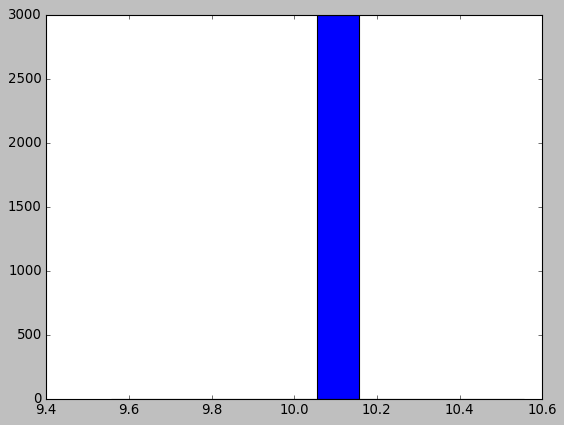

In [109]:
plt.hist(samples[:,0]);